# DATA 620 Final Redux - Jazz Musicians Network Analysis
## Author: Kevin Kirby


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities

## Investgation:

I found out early on that Jazz musicians are social creatives by nature. 198 people getting everyone ready.

In [3]:
with open('jazz.net', 'r') as f:
    lines = f.readlines()

with open('jazz_fixed.net', 'w') as f:
    for line in lines:
        if line.strip().startswith("*Vertices"):
            num_vertices = int(line.split()[1])
            f.write(line)
            for i in range(1, num_vertices + 1):
                f.write(f'{i} "{i}"\n')
        elif not line.strip().startswith("*Vertices"):
            f.write(line)

jazzfixed = nx.read_pajek('jazz_fixed.net')
jf_undirected = nx.Graph(jazzfixed.to_undirected()) 

print(f" {jazzfixed.number_of_nodes()} musicians had {jazzfixed.number_of_edges()} collaborations")


 198 musicians had 5484 collaborations


## 1. Analysis by muscian's centrality

It's interesting to sde the quick up front drop off, following nacl a second half flattning out. I was expecting a lot of high values upfront and then a rapid tapering but that's more appropriate for popularity. 

In [ ]:
degree_cent = nx.degree_centrality(jazzfixed)
top_10 = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 musician by degree centrality")
for i, (node, cent) in enumerate(top_10, 1):
    connections = jazzfixed.degree(node)
    print(f"  {i:2}. Musician {node:3} {connections} collaborations. 3. ({cent:.3f})")

Top 10 musician for degree 
   1. Musician 136 - 200 collaborations (1.015)
   2. Musician 60  - 192 collaborations (0.975)
   3. Musician 132 - 150 collaborations (0.761)
   4. Musician 168 - 148 collaborations (0.751)
   5. Musician 70  - 124 collaborations (0.629)
   6. Musician 99  - 120 collaborations (0.609)
   7. Musician 108 - 120 collaborations (0.609)
   8. Musician 83  - 118 collaborations (0.599)
   9. Musician 158 - 118 collaborations (0.599)
  10. Musician 7   - 114 collaborations (0.579)


## 2. Community detection

I wondering what drove them to these three places versus others. Networking effect takes over at some point but, in the beginning, there's a different kind of reasoning.

In [14]:
communities = list(greedy_modularity_communities(jazzfixed))

print(f"\n Found {len(communities)} communities")
sizes = sorted([len(c) for c in communities], reverse=True)
print(f"  Largest 5 communities: {sizes[:5]}")
print(f"  Total musicians in communities: {sum(sizes)}")


 Found 3 communities
  Largest 5 communities: [69, 66, 63]
  Total musicians in communities: 198


## 3. Visualizations

The large red nodes are the centrsal figures, connecting to amost everyone. This quickly peters out, leaving the lesser knowsn almost entirely on their own. This is collaboration inequality and it's very common in this kind of world.

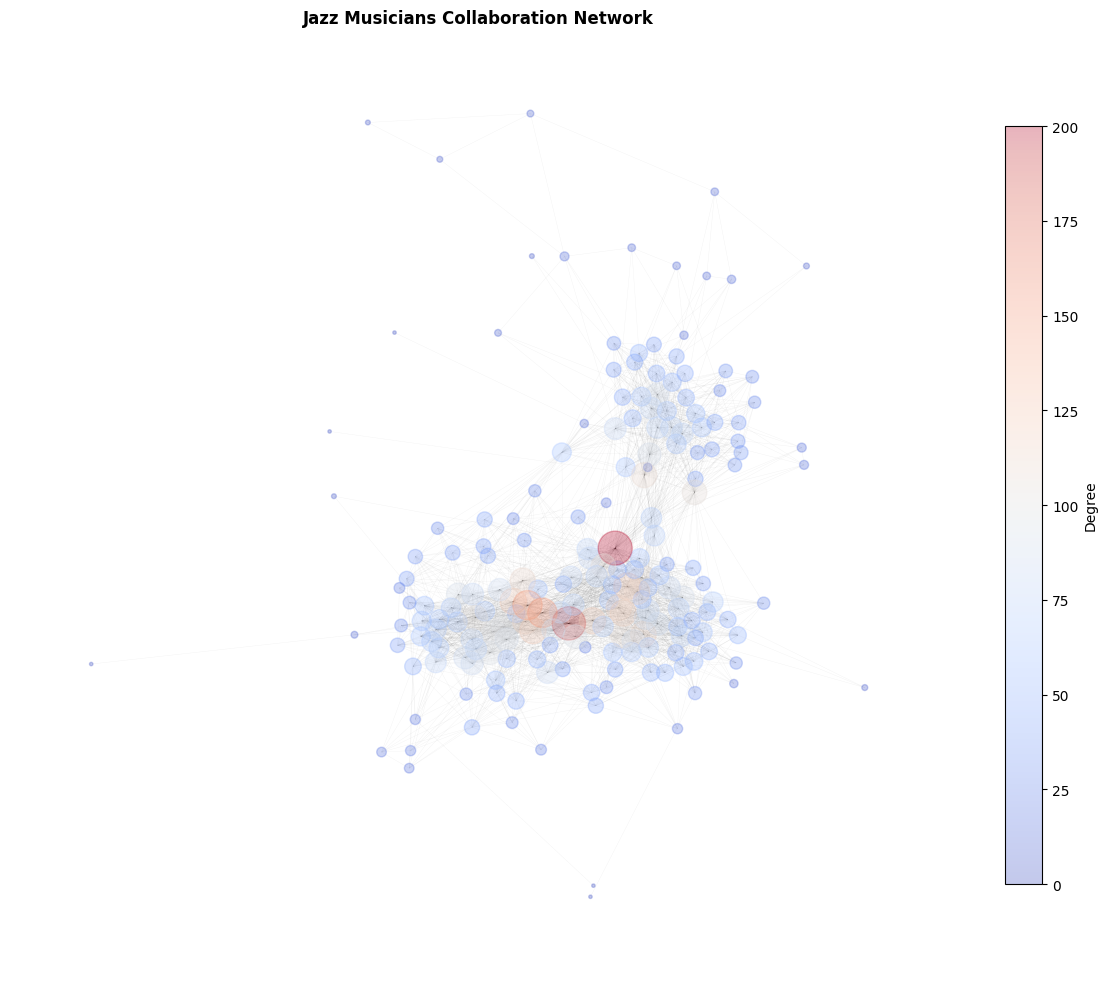

In [17]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.3)  
node_colors = [jazzfixed.degree(n) for n in jazzfixed.nodes()]
node_sizes = [jazzfixed.degree(n)*3 for n in jazzfixed.nodes()]

im = nx.draw_networkx_nodes(
    jazzfixed, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap='coolwarm',
    alpha=0.3,
    vmin=0,
    vmax=max(node_colors)
    )

nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3) 

plt.title("Jazz Musicians Collaboration Network", fontsize=12, weight='bold')
plt.axis('off')
plt.colorbar(im, label='Degree', shrink=0.8)
plt.tight_layout()
plt.savefig('/Users/uwsthoughts/Desktop/local_files/redo/jazz_final.png', dpi=150, bbox_inches='tight')
